# Exploratory Data Analysis (EDA)
# Dataset: Prediksi Risiko Banjir di Jabodetabek

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

✅ Libraries imported successfully!


## 1. Load Dataset & Overview

In [ ]:
df = pd.read_csv('data_banjir_filtered.csv')

print("=" * 70)
print("DATASET OVERVIEW")
print("=" * 70)
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nColumns:")
for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    print(f"  {i:2d}. {col:25s} ({dtype})")

print(f"\nDataset loaded successfully!")

DATASET OVERVIEW
📊 Shape: 10,980 rows × 16 columns
💾 Memory Usage: 2.91 MB

📋 Columns:
   1. kabupaten_kota            (object)
   2. kecamatan                 (object)
   3. avg_rainfall              (float64)
   4. max_rainfall              (float64)
   5. avg_temperature           (float64)
   6. elevation                 (float64)
   7. landcover_class           (object)
   8. ndvi                      (float64)
   9. slope                     (float64)
  10. soil_moisture             (float64)
  11. year                      (int64)
  12. month                     (int64)
  13. banjir                    (int64)
  14. lat                       (float64)
  15. long                      (float64)
  16. jumlah_penduduk           (float64)

✅ Dataset loaded successfully!


In [ ]:
print("=" * 70)
print("FIRST 5 ROWS")
print("=" * 70)
display(df.head())

print("\n" + "=" * 70)
print("LAST 5 ROWS")
print("=" * 70)
display(df.tail())

print("\n" + "=" * 70)
print("RANDOM SAMPLE (10 rows)")
print("=" * 70)
display(df.sample(10, random_state=42))

FIRST 5 ROWS


,kabupaten_kota,kecamatan,avg_rainfall,max_rainfall,avg_temperature,elevation,landcover_class,ndvi,slope,soil_moisture,year,month,banjir,lat,long,jumlah_penduduk
0,bogor,babakanmadang,64.775,124.032,28.76,501.913,Tree cover,0.564,5.001,39.583,2020,1,1,-6.5917,106.9020,121972.0
1,bogor,bojonggede,68.241,128.949,32.89,133.589,Built-up,0.429,0.293,40.414,2020,1,1,-6.4774,106.7927,266481.0
2,bogor,caringin,56.423,92.324,29.93,765.651,Tree cover,0.513,4.954,39.662,2020,1,0,-6.7366,106.8660,138901.0
3,bogor,cariu,60.034,98.129,30.02,143.845,Tree cover,0.652,2.107,39.014,2020,1,0,-6.5273,107.1371,54478.0
4,bogor,ciampea,66.380,133.877,30.27,212.619,Tree cover,0.569,1.340,39.658,2020,1,0,-6.5742,106.6980,175400.0



LAST 5 ROWS


,kabupaten_kota,kecamatan,avg_rainfall,max_rainfall,avg_temperature,elevation,landcover_class,ndvi,slope,soil_moisture,year,month,banjir,lat,long,jumlah_penduduk
10975,jakarta pusat,kemayoran,30.434,43.609,39.31,6.168,Built-up,0.118,0.103,37.78,2024,12,0,-6.1627,106.8558,255632.0
10976,jakarta pusat,menteng,30.078,43.781,39.31,10.741,Built-up,0.138,0.099,37.78,2024,12,0,-6.1958,106.8353,87964.0
10977,jakarta pusat,sawahbesar,37.754,56.977,39.31,7.059,Built-up,0.128,0.090,37.78,2024,12,0,-6.1539,106.8332,126019.0
10978,jakarta pusat,senen,27.765,39.750,39.31,10.007,Built-up,0.114,0.092,37.78,2024,12,0,-6.1842,106.8459,124341.0
10979,jakarta pusat,tanahabang,35.723,51.503,39.31,12.450,Built-up,0.164,0.130,37.78,2024,12,0,-6.2054,106.8094,173198.0



RANDOM SAMPLE (10 rows)


,kabupaten_kota,kecamatan,avg_rainfall,max_rainfall,avg_temperature,elevation,landcover_class,ndvi,slope,soil_moisture,year,month,banjir,lat,long,jumlah_penduduk
107,bekasi,bojongmangu,57.008,81.637,30.40,48.869,Tree cover,0.578,0.584,37.163,2020,1,0,-6.4389,107.1778,30251.0
5471,jakarta selatan,tebet,19.506,37.893,36.55,17.948,Built-up,0.269,0.137,37.510,2022,6,0,-6.2289,106.8509,240402.0
9573,kota tangerang,pinang,13.528,30.566,34.00,19.041,Built-up,0.445,0.132,36.845,2024,5,0,-6.2153,106.6662,186671.0
6572,jakarta timur,ciracas,39.517,81.261,39.72,53.480,Built-up,0.207,0.263,41.410,2022,12,0,-6.3339,106.8784,327813.0
5928,tangerang,jambe,69.332,187.843,31.07,43.823,Tree cover,0.616,0.302,37.399,2022,9,0,-6.3238,106.4992,55650.0
2714,jakarta utara,pademangan,23.337,39.953,29.95,3.198,Built-up,0.188,0.104,38.017,2021,3,0,-6.1301,106.8381,170512.0
3984,jakarta barat,cengkareng,28.067,80.818,40.21,5.286,Built-up,0.208,0.059,36.585,2021,10,0,-6.1515,106.7369,591748.0
10798,bogor,bojonggede,65.784,108.868,27.27,133.589,Built-up,0.396,0.293,40.181,2024,12,0,-6.4774,106.7927,266481.0
8836,kota tangerang,karangtengah,56.631,102.455,39.23,13.076,Built-up,0.197,0.156,38.160,2024,1,1,-6.2101,106.7097,117440.0
5152,bogor,parung,54.363,92.945,33.15,104.116,Tree cover,0.634,0.338,41.320,2022,5,0,-6.4349,106.7128,128905.0


In [ ]:
print("=" * 70)
print("DATASET INFO")
print("=" * 70)
df.info()

print("\n" + "=" * 70)
print("DATA TYPES SUMMARY")
print("=" * 70)
print(df.dtypes.value_counts())

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kabupaten_kota   10980 non-null  object 
 1   kecamatan        10980 non-null  object 
 2   avg_rainfall     10980 non-null  float64
 3   max_rainfall     10980 non-null  float64
 4   avg_temperature  10980 non-null  float64
 5   elevation        10980 non-null  float64
 6   landcover_class  10980 non-null  object 
 7   ndvi             10980 non-null  float64
 8   slope            10980 non-null  float64
 9   soil_moisture    10980 non-null  float64
 10  year             10980 non-null  int64  
 11  month            10980 non-null  int64  
 12  banjir           10980 non-null  int64  
 13  lat              10980 non-null  float64
 14  long             10980 non-null  float64
 15  jumlah_penduduk  10980 non-null  float64
dtypes: float64(10), int64(3), object(3)
memory us

## 2. Data Quality Check

In [ ]:
print("=" * 70)
print("MISSING VALUES ANALYSIS")
print("=" * 70)

missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing.values,
    'Missing_Percent': missing_pct.values
}).sort_values('Missing_Count', ascending=False)

print(missing_df.to_string(index=False))
print(f"\nTotal Missing Values: {missing.sum():,}")
print(f"Columns with Missing Values: {(missing > 0).sum()}")

if missing.sum() == 0:
    print("\nNo missing values found! Dataset is complete.")

MISSING VALUES ANALYSIS
         Column  Missing_Count  Missing_Percent
 kabupaten_kota              0              0.0
      kecamatan              0              0.0
   avg_rainfall              0              0.0
   max_rainfall              0              0.0
avg_temperature              0              0.0
      elevation              0              0.0
landcover_class              0              0.0
           ndvi              0              0.0
          slope              0              0.0
  soil_moisture              0              0.0
           year              0              0.0
          month              0              0.0
         banjir              0              0.0
            lat              0              0.0
           long              0              0.0
jumlah_penduduk              0              0.0

📊 Total Missing Values: 0
📊 Columns with Missing Values: 0

✅ No missing values found! Dataset is complete.


In [ ]:
print("=" * 70)
print("DUPLICATE ROWS CHECK")
print("=" * 70)

duplicates = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicates:,}")
print(f"Percentage: {(duplicates/len(df)*100):.2f}%")

if duplicates > 0:
    print(f"\nFound {duplicates} duplicate rows")
    print("\nSample duplicates:")
    display(df[df.duplicated(keep=False)].head(10))
else:
    print("\nNo duplicate rows found!")

DUPLICATE ROWS CHECK
📊 Total Duplicate Rows: 0
📊 Percentage: 0.00%

✅ No duplicate rows found!


## 3. Statistical Summary

In [ ]:
print("=" * 70)
print("DESCRIPTIVE STATISTICS - NUMERICAL FEATURES")
print("=" * 70)

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {len(numerical_cols)}")
print(f"{numerical_cols}\n")

display(df[numerical_cols].describe().T.style.background_gradient(cmap='YlOrRd'))

DESCRIPTIVE STATISTICS - NUMERICAL FEATURES
Numerical columns: 13
['avg_rainfall', 'max_rainfall', 'avg_temperature', 'elevation', 'ndvi', 'slope', 'soil_moisture', 'year', 'month', 'banjir', 'lat', 'long', 'jumlah_penduduk']



,count,mean,std,min,25%,50%,75%,max
avg_rainfall,10980.000000,38.121924,24.491624,0.525000,18.945500,33.924500,51.845250,156.203000
max_rainfall,10980.000000,73.658390,43.413469,0.858000,42.917000,67.187000,96.124250,386.707000
avg_temperature,10980.000000,34.486187,4.045799,14.200000,31.500000,35.120000,37.690000,43.830000
elevation,10980.000000,111.867934,210.437843,1.597000,10.470000,27.206000,89.403000,1216.752000
ndvi,10980.000000,0.418700,0.159695,0.082000,0.295000,0.407000,0.527250,0.840000
slope,10980.000000,0.820366,1.653446,0.044000,0.102000,0.174000,0.340000,7.732000
soil_moisture,10980.000000,37.053202,3.420405,16.140000,35.982250,37.813000,38.932000,42.223000
year,10980.000000,2022.000000,1.414278,2020.000000,2021.000000,2022.000000,2023.000000,2024.000000
month,10980.000000,6.500000,3.452210,1.000000,3.750000,6.500000,9.250000,12.000000
banjir,10980.000000,0.076958,0.266537,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
print("=" * 70)
print("CATEGORICAL FEATURES SUMMARY")
print("=" * 70)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {len(categorical_cols)}")
print(f"{categorical_cols}\n")

for col in categorical_cols:
    print(f"\n{col.upper()}")
    print("-" * 50)
    value_counts = df[col].value_counts()
    print(f"Unique values: {df[col].nunique()}")
    print(f"\nTop 10 values:")
    print(value_counts.head(10))

CATEGORICAL FEATURES SUMMARY
Categorical columns: 3
['kabupaten_kota', 'kecamatan', 'landcover_class']


📊 KABUPATEN_KOTA
--------------------------------------------------
Unique values: 13

Top 10 values:
kabupaten_kota
bogor              2400
tangerang          1740
bekasi             1380
kota tangerang      780
kota bekasi         720
depok               660
jakarta selatan     600
jakarta timur       600
jakarta barat       480
jakarta pusat       480
Name: count, dtype: int64

📊 KECAMATAN
--------------------------------------------------
Unique values: 180

Top 10 values:
kecamatan
tamansari         120
setu              120
cipayung          120
tambunselatan      60
kedungwaringin     60
muaragembong       60
pebayuran          60
serangbaru         60
sukakarya          60
sukatani           60
Name: count, dtype: int64

📊 LANDCOVER_CLASS
--------------------------------------------------
Unique values: 4

Top 10 values:
landcover_class
Built-up                  6300
Tree co

## 4. Target Variable Analysis

TARGET VARIABLE: BANJIR

Distribution:
  0: 10,135 (92.30%)
  1: 845 (7.70%)

Class Balance Ratio: 11.99:1


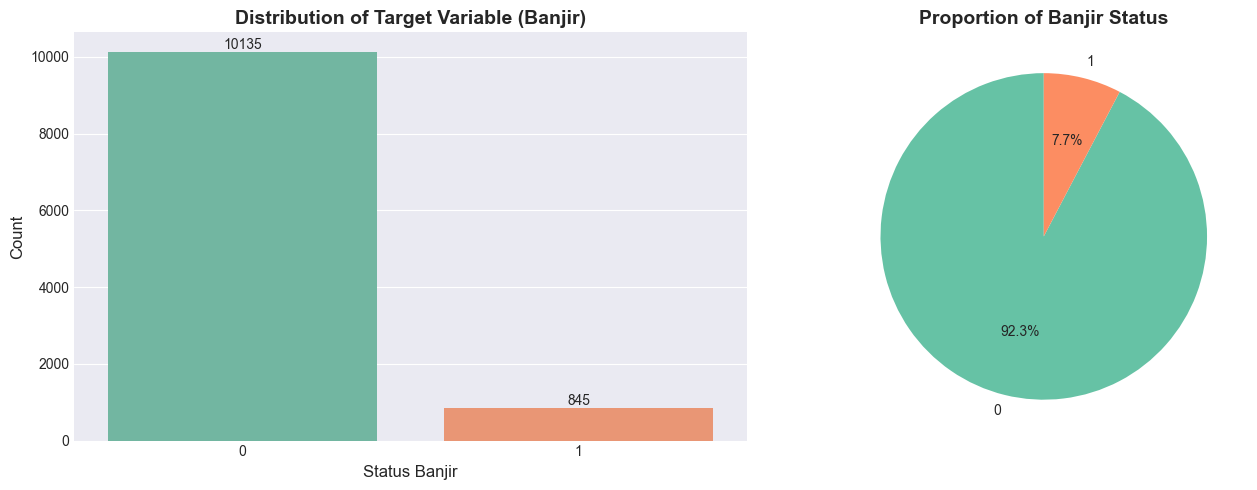


⚠️  WARNING: Class imbalance detected! Consider using techniques like:
   - SMOTE (Synthetic Minority Over-sampling)
   - Class weights in model
   - Stratified sampling


In [ ]:
print("=" * 70)
print("TARGET VARIABLE: BANJIR")
print("=" * 70)

target_counts = df['banjir'].value_counts()
target_pct = df['banjir'].value_counts(normalize=True) * 100

print("\nDistribution:")
for value, count in target_counts.items():
    pct = target_pct[value]
    print(f"  {value}: {count:,} ({pct:.2f}%)")

print(f"\nClass Balance Ratio: {target_counts.max() / target_counts.min():.2f}:1")


fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='banjir', ax=axes[0], palette='Set2')
axes[0].set_title('Distribution of Target Variable (Banjir)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Status Banjir', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d')

axes[1].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=sns.color_palette('Set2'))
axes[1].set_title('Proportion of Banjir Status', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

if target_counts.max() / target_counts.min() > 2:
    print("\nWARNING: Class imbalance detected! Consider using techniques like:")
    print("   - SMOTE (Synthetic Minority Over-sampling)")
    print("   - Class weights in model")
    print("   - Stratified sampling")
else:
    print("\nClasses are relatively balanced.")

## 5. Univariate Analysis - Numerical Features

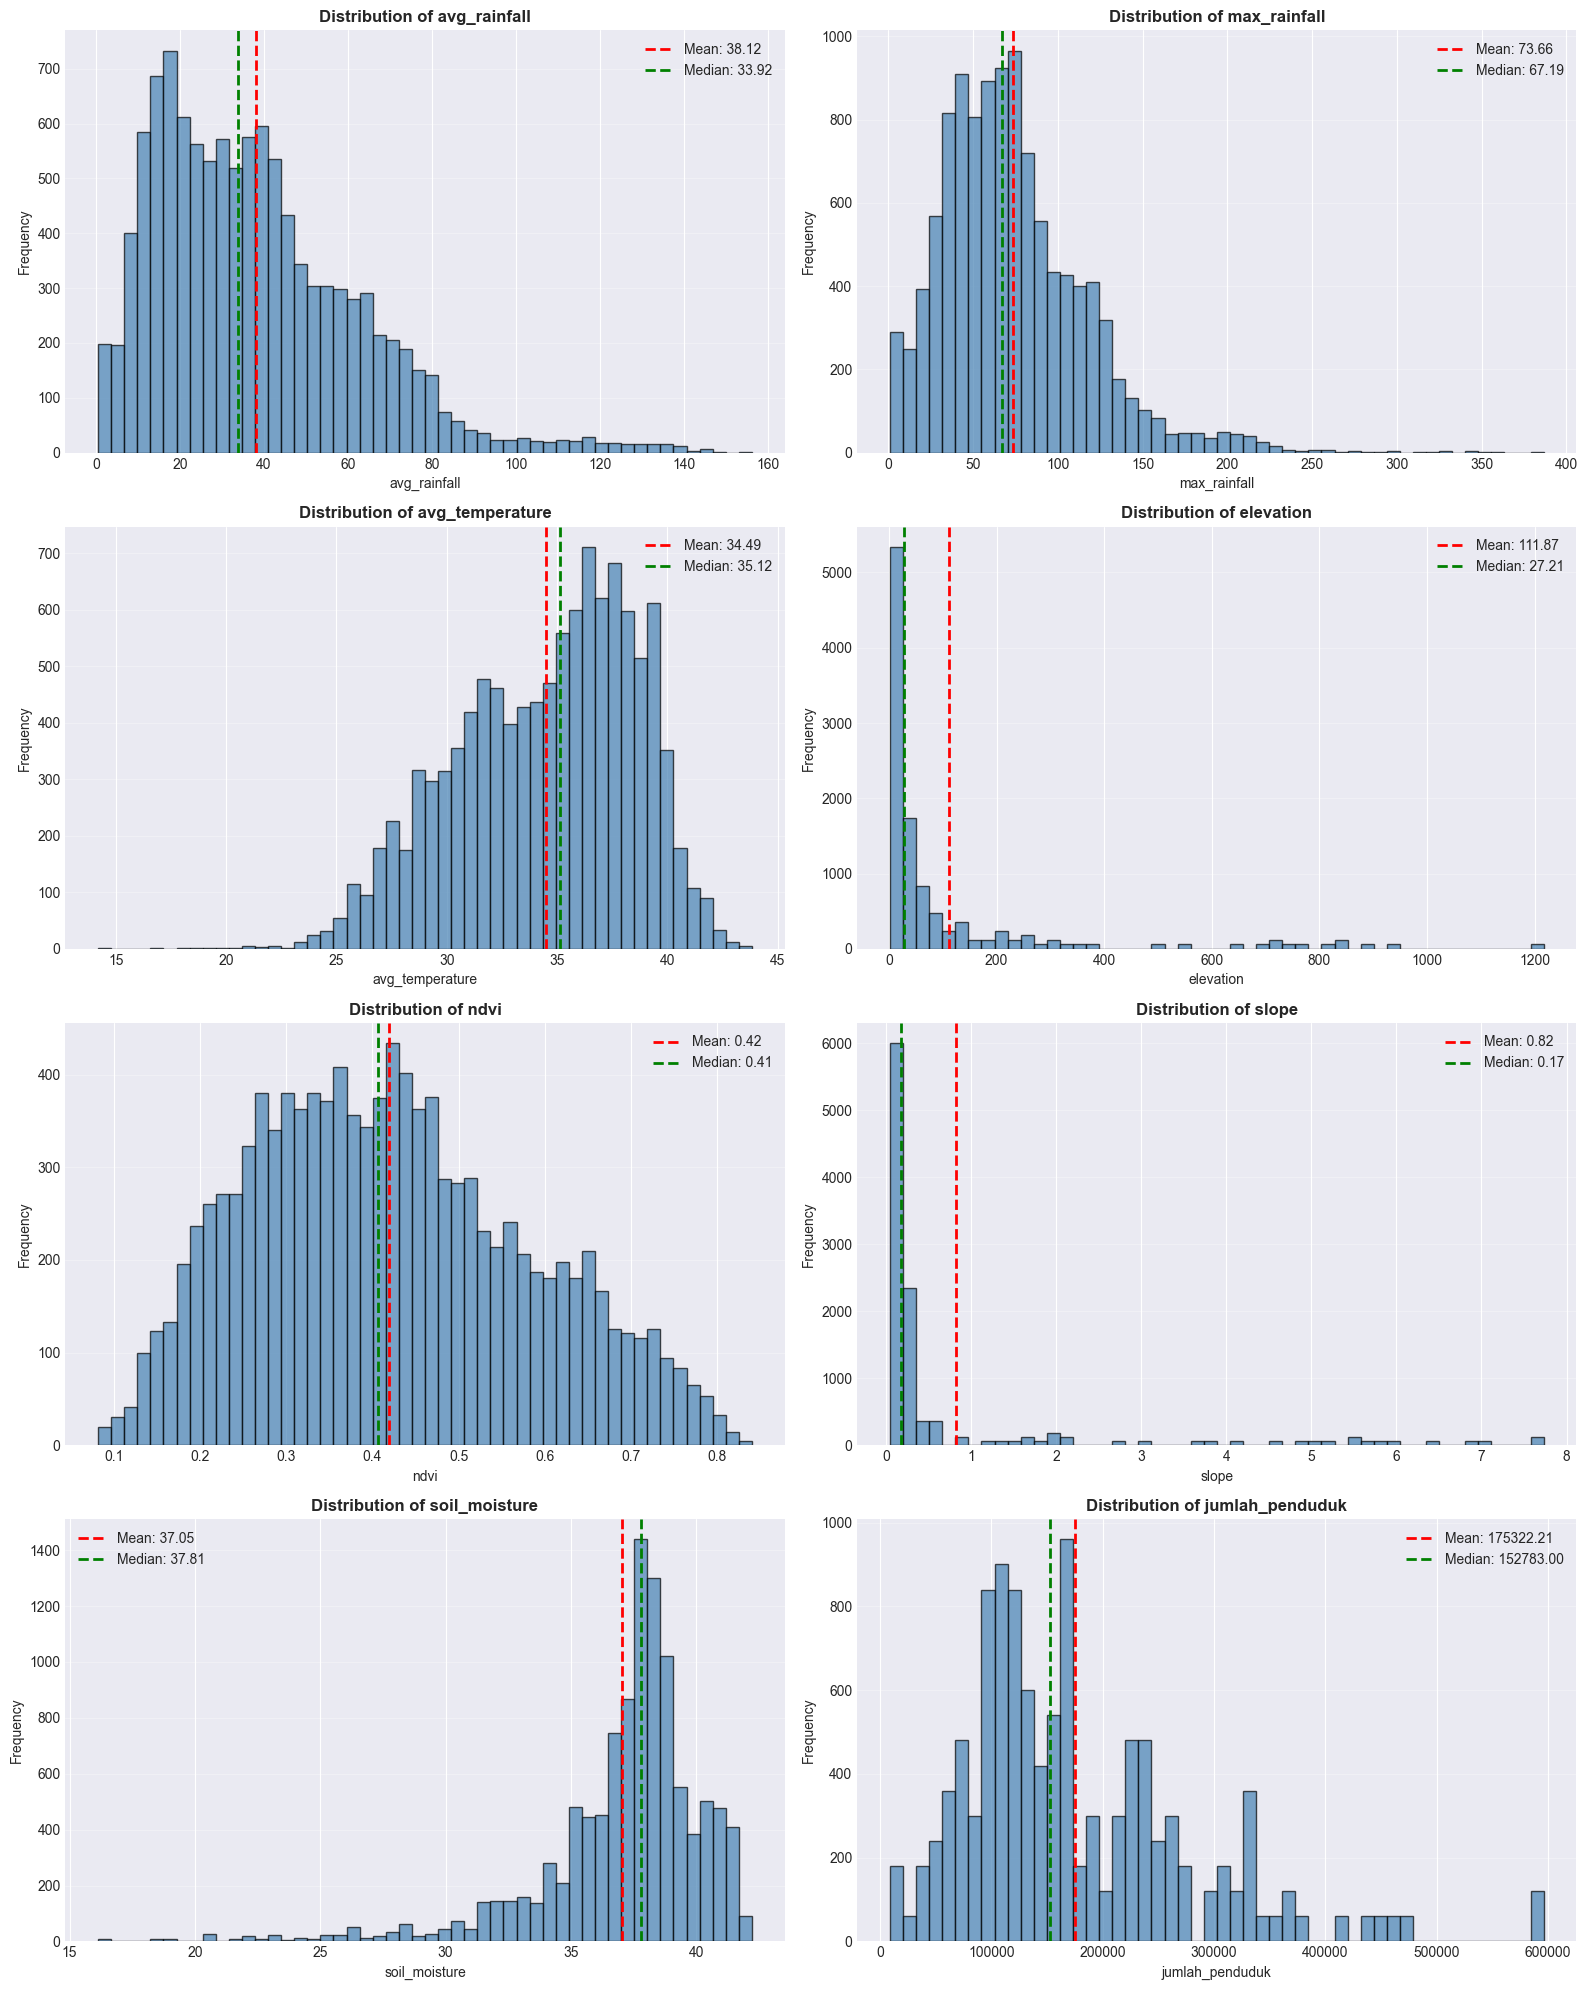

In [ ]:
numerical_features = ['avg_rainfall', 'max_rainfall', 'avg_temperature', 
                      'elevation', 'ndvi', 'slope', 'soil_moisture', 'jumlah_penduduk']

fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)
    
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.show()

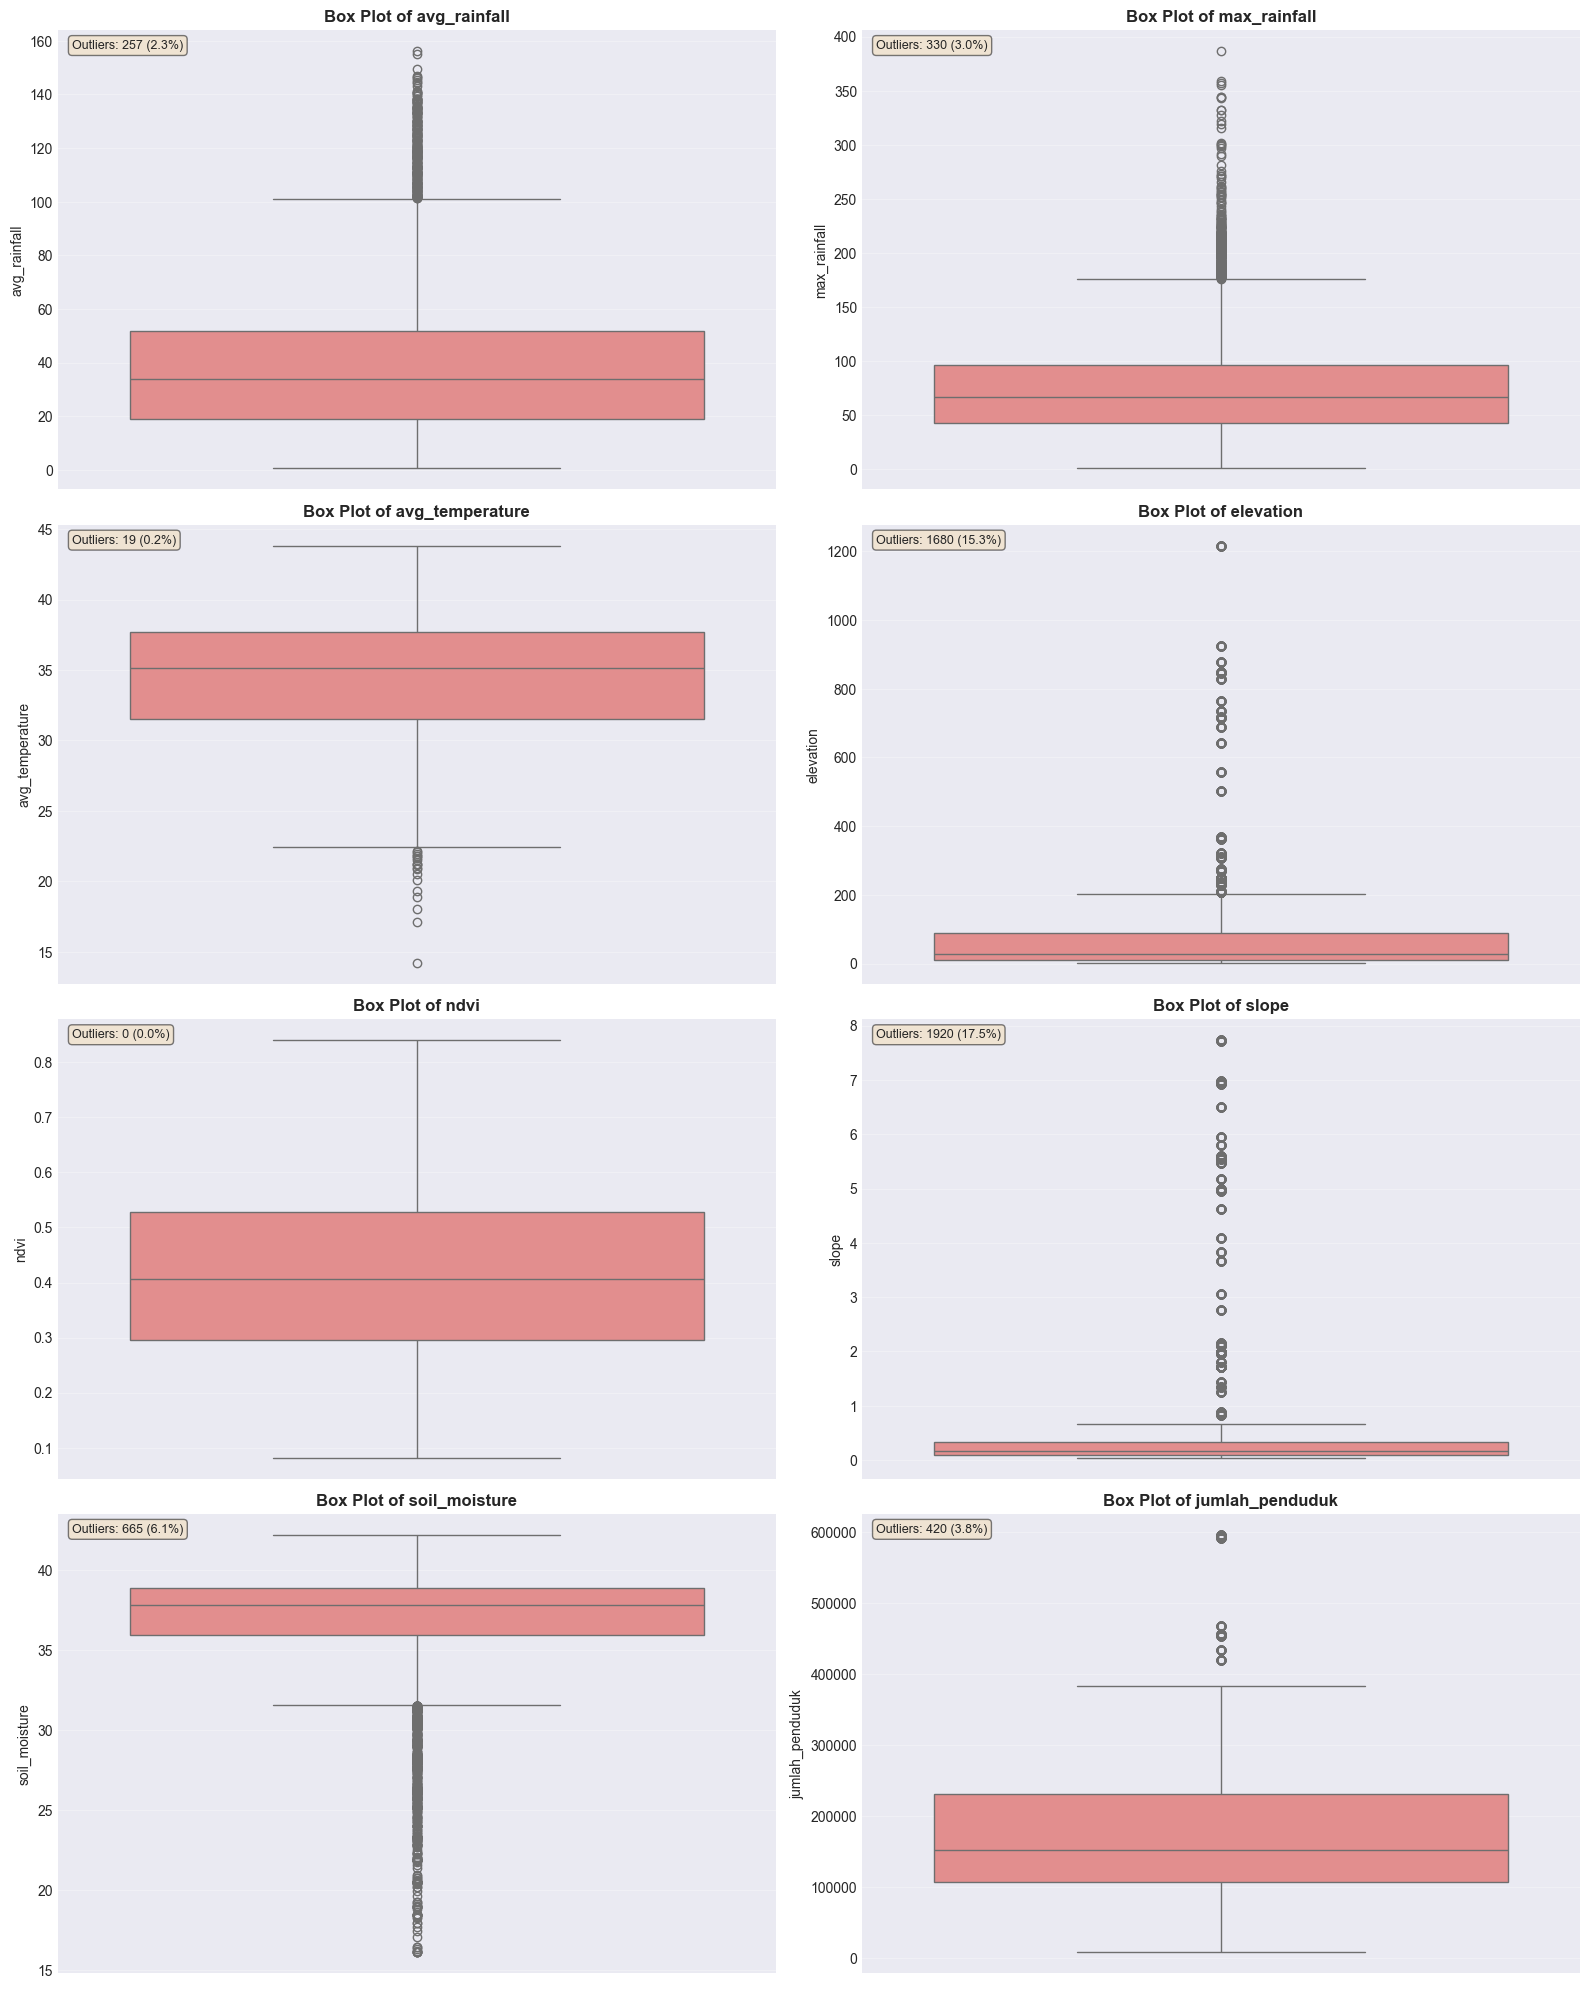

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    sns.boxplot(data=df, y=col, ax=axes[idx], color='lightcoral')
    axes[idx].set_title(f'Box Plot of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][col]
    axes[idx].text(0.02, 0.98, f'Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)', 
                   transform=axes[idx].transAxes, fontsize=9, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

## 6. Univariate Analysis - Categorical Features

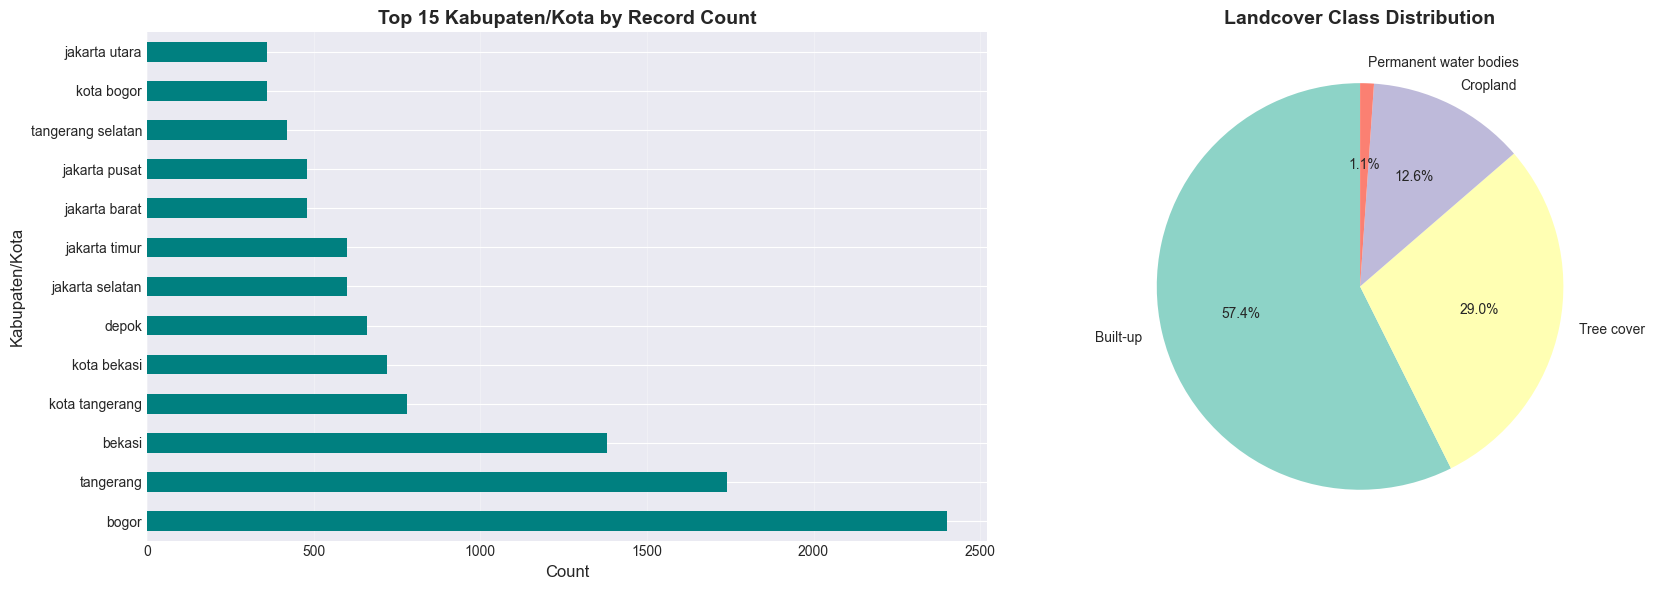


CATEGORICAL FEATURES DISTRIBUTION

Kabupaten/Kota: 13 unique values
Kecamatan: 180 unique values
Landcover Class: 4 unique values


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

kabupaten_counts = df['kabupaten_kota'].value_counts().head(15)
kabupaten_counts.plot(kind='barh', ax=axes[0], color='teal')
axes[0].set_title('Top 15 Kabupaten/Kota by Record Count', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Count', fontsize=12)
axes[0].set_ylabel('Kabupaten/Kota', fontsize=12)
axes[0].grid(axis='x', alpha=0.3)

landcover_counts = df['landcover_class'].value_counts()
axes[1].pie(landcover_counts, labels=landcover_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=sns.color_palette('Set3', len(landcover_counts)))
axes[1].set_title('Landcover Class Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("CATEGORICAL FEATURES DISTRIBUTION")
print("=" * 70)
print(f"\nKabupaten/Kota: {df['kabupaten_kota'].nunique()} unique values")
print(f"Kecamatan: {df['kecamatan'].nunique()} unique values")
print(f"Landcover Class: {df['landcover_class'].nunique()} unique values")

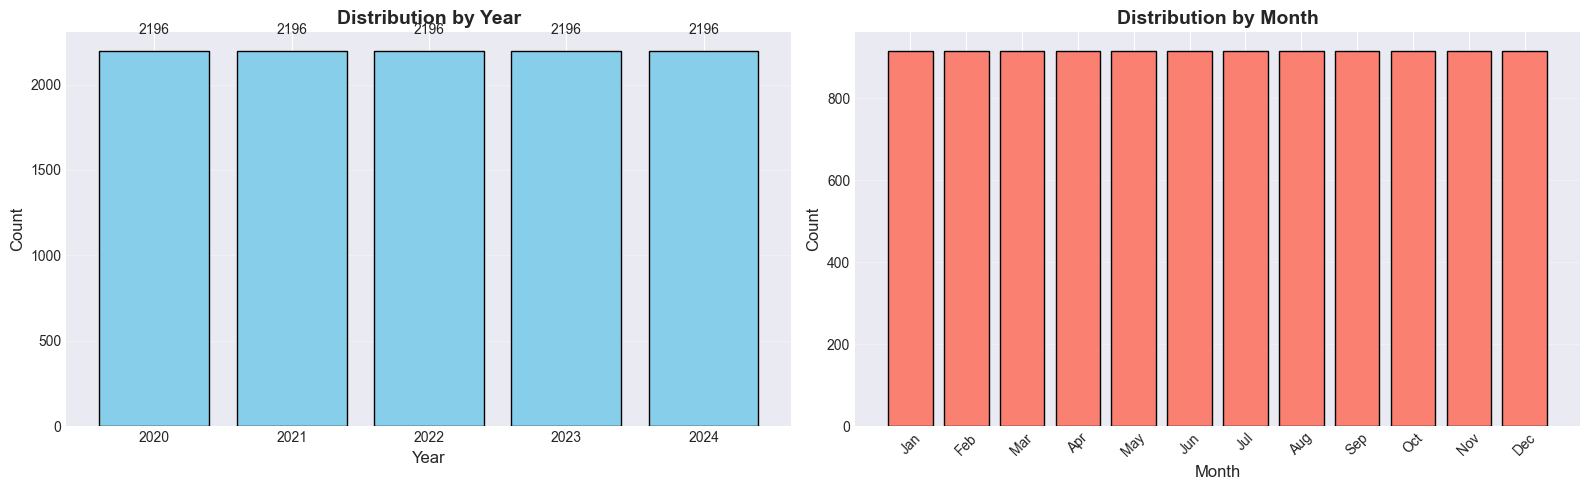

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

year_counts = df['year'].value_counts().sort_index()
axes[0].bar(year_counts.index, year_counts.values, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution by Year', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(year_counts.values):
    axes[0].text(year_counts.index[i], v + 100, str(v), ha='center', fontsize=10)

month_counts = df['month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1].bar(month_counts.index, month_counts.values, color='salmon', edgecolor='black')
axes[1].set_title('Distribution by Month', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(month_names, rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

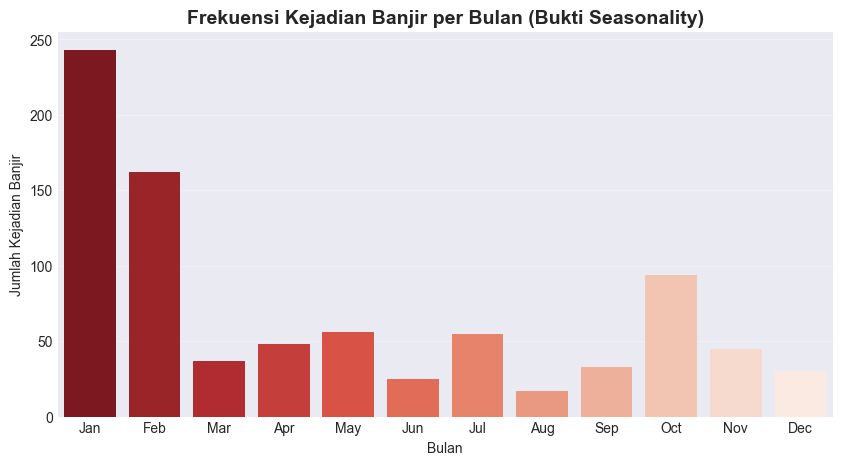

In [ ]:
flood_only = df[df['banjir'] == 1]

monthly_flood_counts = flood_only['month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_flood_counts.index, y=monthly_flood_counts.values, palette='Reds_r')

plt.title('Frekuensi Kejadian Banjir per Bulan (Bukti Seasonality)', fontsize=14, fontweight='bold')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kejadian Banjir')
plt.xticks(ticks=range(0, 12), labels=month_names)
plt.grid(axis='y', alpha=0.3)
plt.show()

## 7. Bivariate Analysis - Numerical Features vs Target

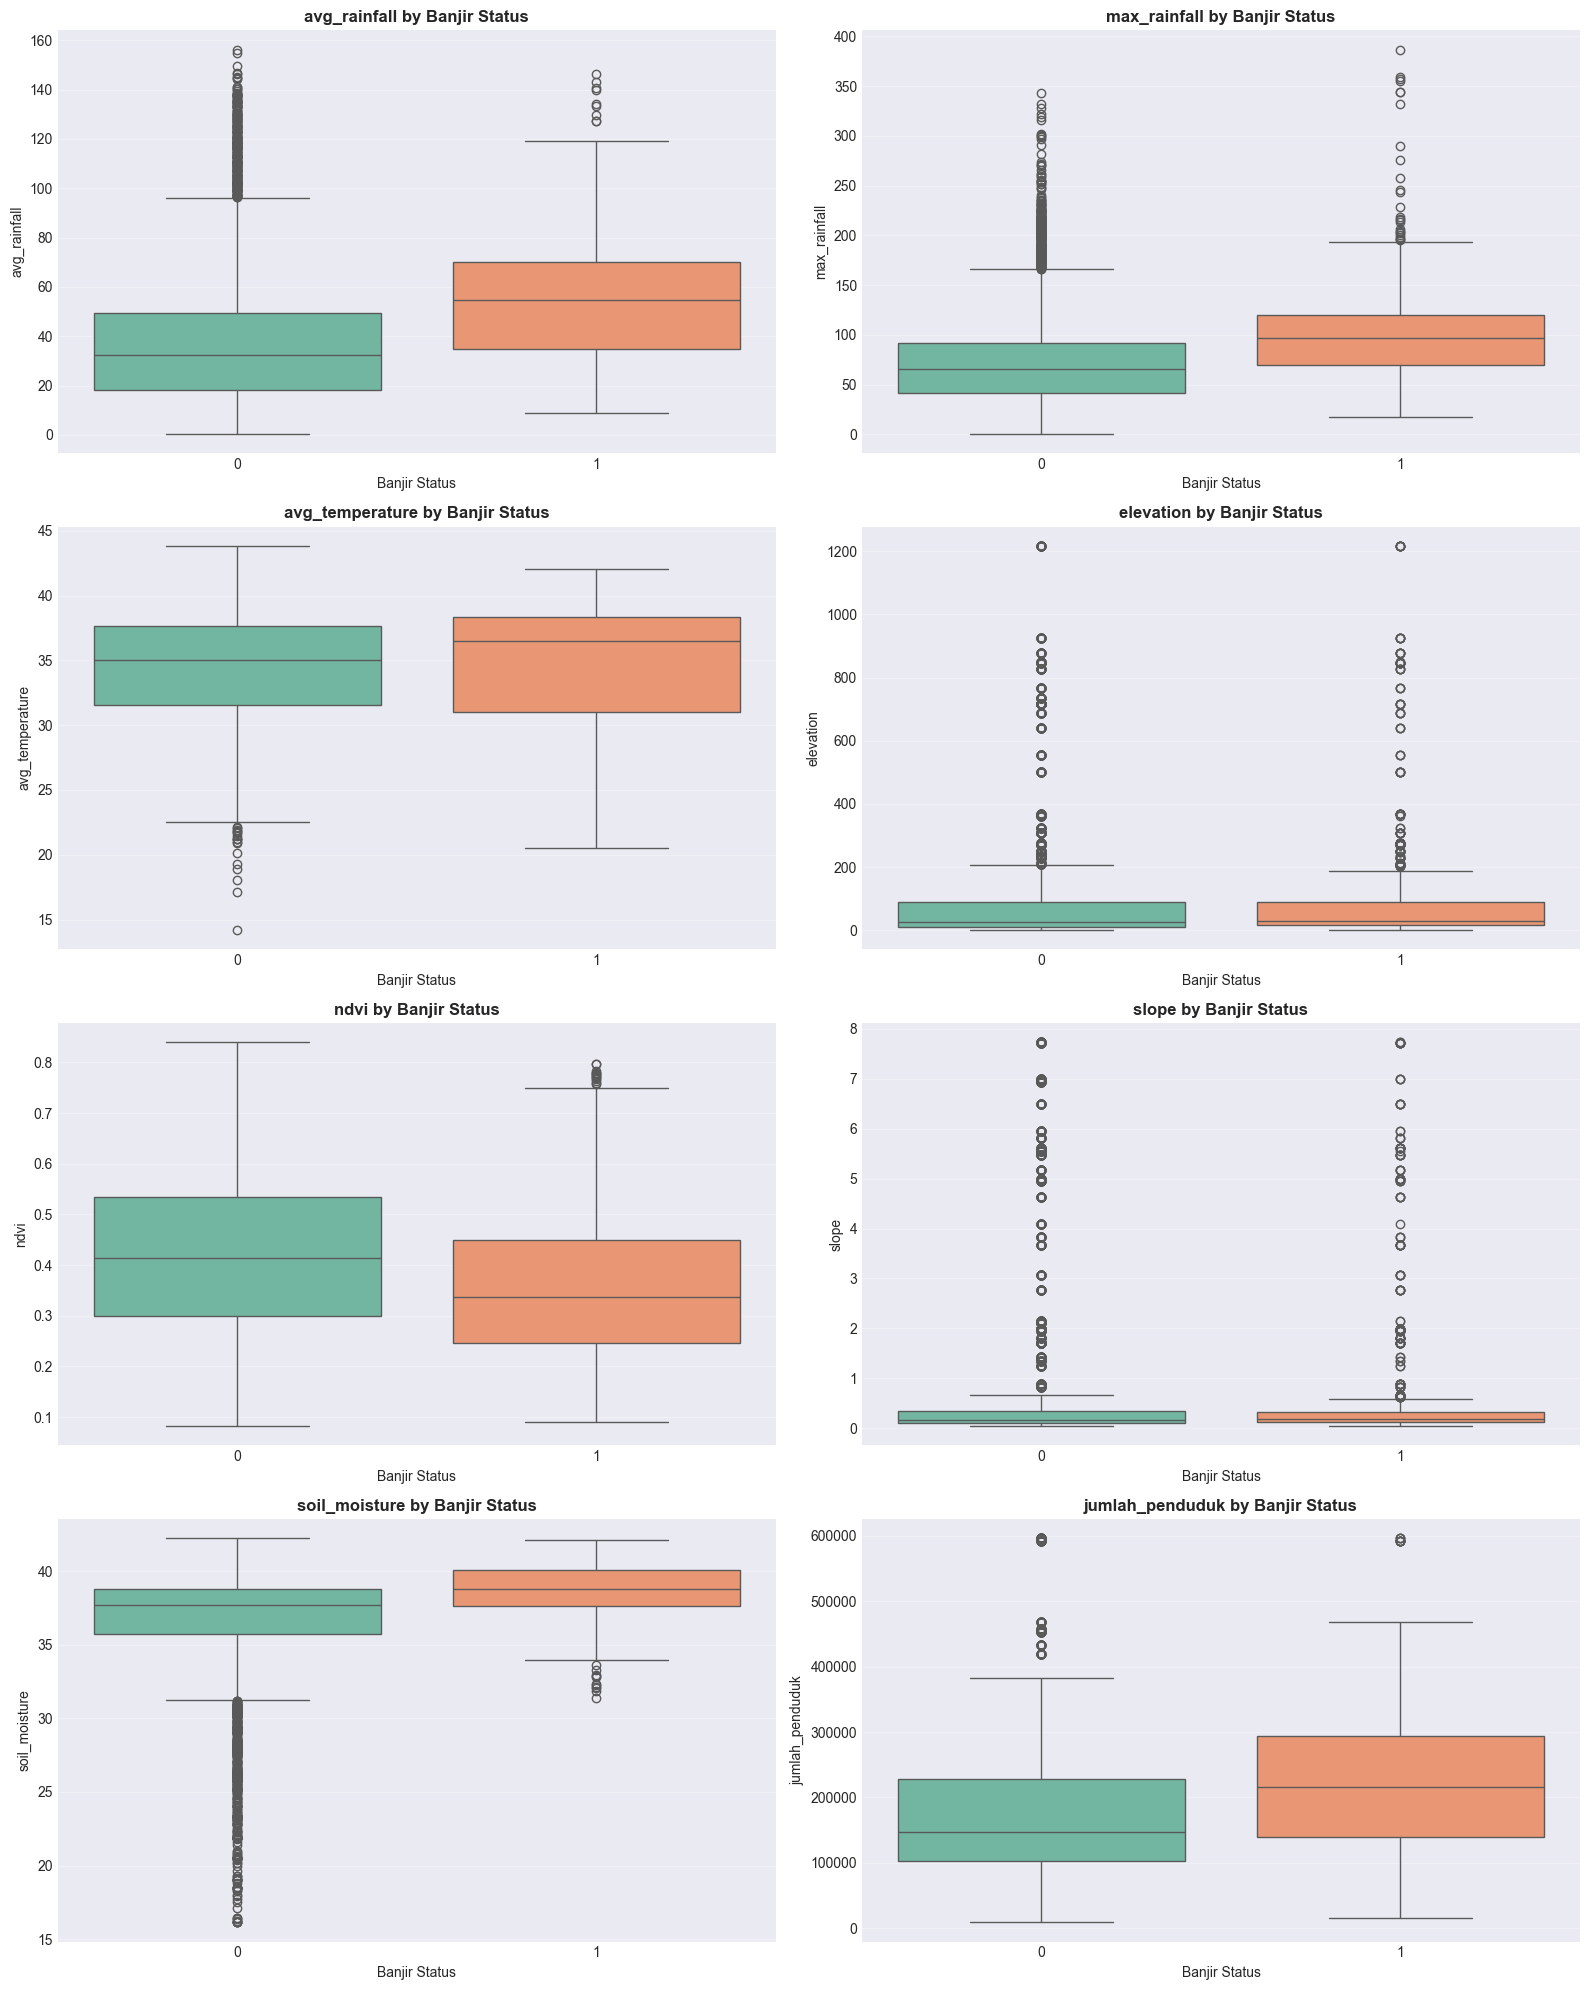

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()

for idx, col in enumerate(numerical_features):
    sns.boxplot(data=df, x='banjir', y=col, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{col} by Banjir Status', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Banjir Status', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
print("=" * 70)
print("STATISTICAL COMPARISON: BANJIR vs TIDAK BANJIR")
print("=" * 70)

for col in numerical_features:
    print(f"\n{col.upper()}")
    print("-" * 50)
    
    banjir_data = df[df['banjir'] == 1][col]
    tidak_banjir_data = df[df['banjir'] == 0][col]
    
    print(f"Banjir (Mean ± Std):       {banjir_data.mean():.2f} ± {banjir_data.std():.2f}")
    print(f"Tidak Banjir (Mean ± Std): {tidak_banjir_data.mean():.2f} ± {tidak_banjir_data.std():.2f}")
    print(f"Difference:                {abs(banjir_data.mean() - tidak_banjir_data.mean()):.2f}")
    
    # T-test
    from scipy import stats
    t_stat, p_value = stats.ttest_ind(banjir_data.dropna(), tidak_banjir_data.dropna())
    print(f"T-test p-value:            {p_value:.4f}", end="")
    if p_value < 0.05:
        print(" Significant difference")
    else:
        print(" No significant difference")

STATISTICAL COMPARISON: BANJIR vs TIDAK BANJIR

📊 AVG_RAINFALL
--------------------------------------------------
Banjir (Mean ± Std):       53.41 ± 22.93
Tidak Banjir (Mean ± Std): 36.85 ± 24.19
Difference:                16.56
T-test p-value:            0.0000 ✅ Significant difference

📊 MAX_RAINFALL
--------------------------------------------------
Banjir (Mean ± Std):       98.90 ± 44.81
Tidak Banjir (Mean ± Std): 71.55 ± 42.63
Difference:                27.35
T-test p-value:            0.0000 ✅ Significant difference

📊 AVG_TEMPERATURE
--------------------------------------------------
Banjir (Mean ± Std):       34.84 ± 4.28
Tidak Banjir (Mean ± Std): 34.46 ± 4.02
Difference:                0.38
T-test p-value:            0.0090 ✅ Significant difference

📊 ELEVATION
--------------------------------------------------
Banjir (Mean ± Std):       112.66 ± 209.90
Tidak Banjir (Mean ± Std): 111.80 ± 210.49
Difference:                0.85
T-test p-value:            0.9098 ❌ No significa

## 8. Bivariate Analysis - Categorical Features vs Target

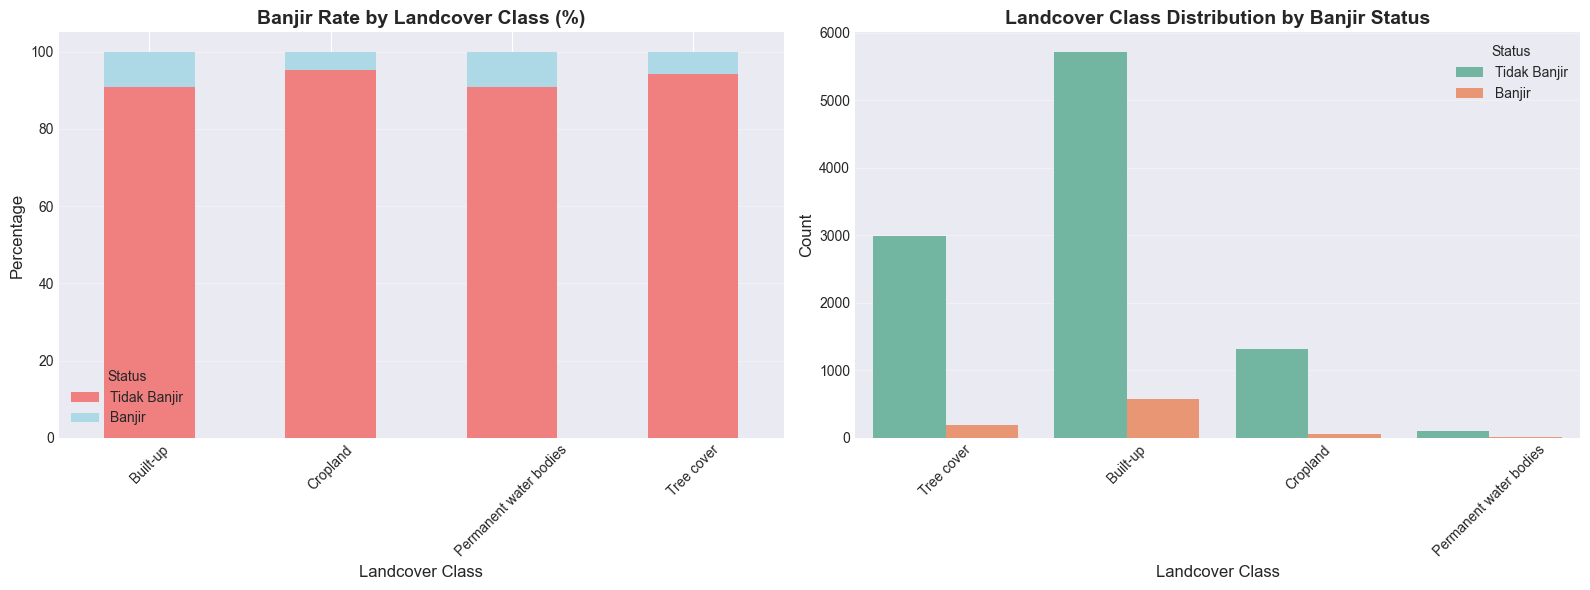


BANJIR RATE BY LANDCOVER CLASS
banjir                      0     1
landcover_class                    
Built-up                90.75  9.25
Cropland                95.22  4.78
Permanent water bodies  90.83  9.17
Tree cover              94.18  5.82


In [ ]:
landcover_banjir = pd.crosstab(df['landcover_class'], df['banjir'], normalize='index') * 100

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

landcover_banjir.plot(kind='bar', stacked=True, ax=axes[0], color=['lightcoral', 'lightblue'])
axes[0].set_title('Banjir Rate by Landcover Class (%)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Landcover Class', fontsize=12)
axes[0].set_ylabel('Percentage', fontsize=12)
axes[0].legend(['Tidak Banjir', 'Banjir'], title='Status')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Count plot
sns.countplot(data=df, x='landcover_class', hue='banjir', ax=axes[1], palette='Set2')
sns.countplot(data=df, x='landcover_class', hue='banjir', ax=axes[1], palette='Set2')
axes[1].set_title('Landcover Class Distribution by Banjir Status', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Landcover Class', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].legend(['Tidak Banjir', 'Banjir'], title='Status')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("BANJIR RATE BY LANDCOVER CLASS")
print("=" * 70)

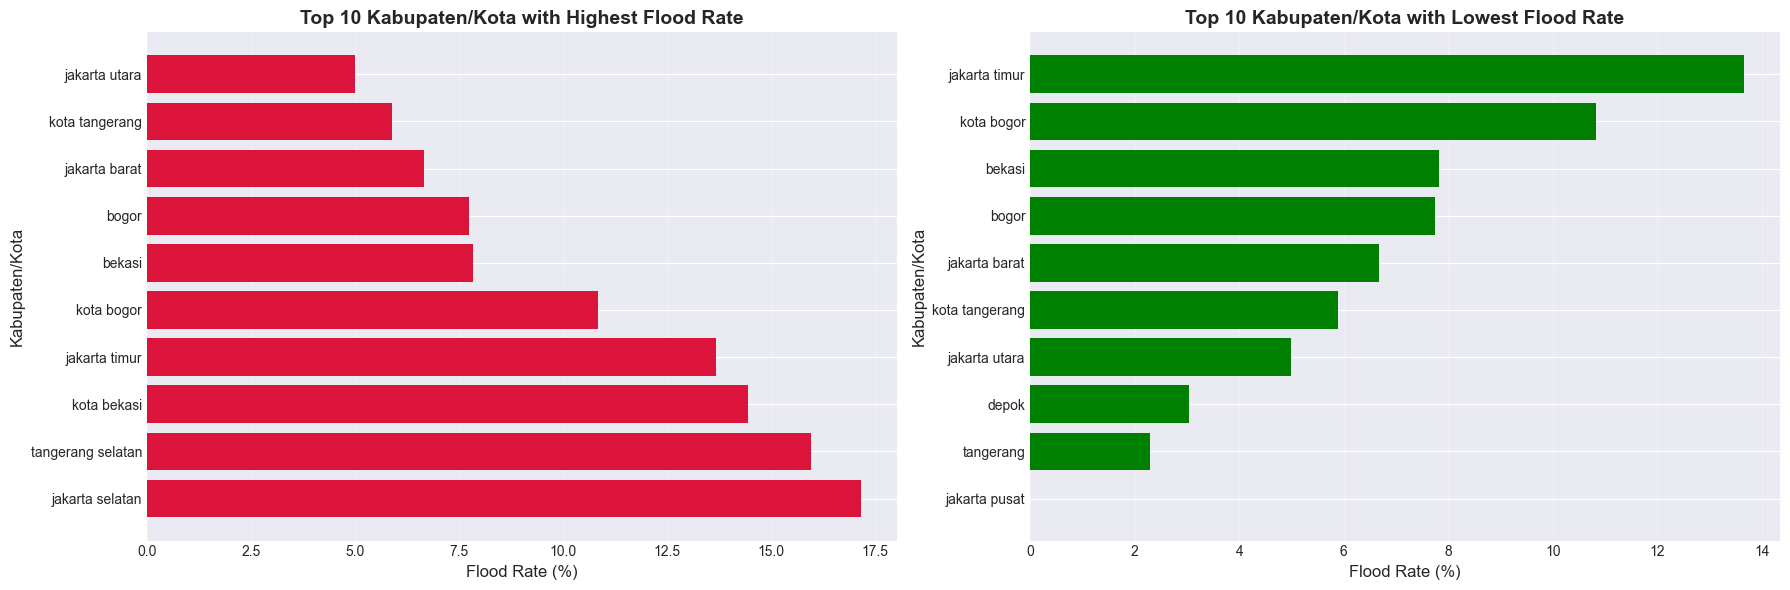

In [ ]:
kabupaten_flood_rate = df.groupby('kabupaten_kota')['banjir'].agg(['sum', 'count', 'mean']).reset_index()
kabupaten_flood_rate.columns = ['kabupaten_kota', 'banjir_count', 'total_records', 'flood_rate']
kabupaten_flood_rate = kabupaten_flood_rate[kabupaten_flood_rate['total_records'] >= 50]
kabupaten_flood_rate = kabupaten_flood_rate.sort_values('flood_rate', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].barh(kabupaten_flood_rate['kabupaten_kota'], kabupaten_flood_rate['flood_rate'] * 100, color='crimson')
axes[0].set_title('Top 10 Kabupaten/Kota with Highest Flood Rate', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Flood Rate (%)', fontsize=12)
axes[0].set_ylabel('Kabupaten/Kota', fontsize=12)
axes[0].grid(axis='x', alpha=0.3)

# Lowest flood rate
kabupaten_flood_rate_low = df.groupby('kabupaten_kota')['banjir'].agg(['sum', 'count', 'mean']).reset_index()
kabupaten_flood_rate_low = df.groupby('kabupaten_kota')['banjir'].agg(['sum', 'count', 'mean']).reset_index()
kabupaten_flood_rate_low.columns = ['kabupaten_kota', 'banjir_count', 'total_records', 'flood_rate']
kabupaten_flood_rate_low = kabupaten_flood_rate_low[kabupaten_flood_rate_low['total_records'] >= 50]
kabupaten_flood_rate_low = kabupaten_flood_rate_low.sort_values('flood_rate', ascending=True).head(10)

axes[1].barh(kabupaten_flood_rate_low['kabupaten_kota'], kabupaten_flood_rate_low['flood_rate'] * 100, color='green')
axes[1].set_title('Top 10 Kabupaten/Kota with Lowest Flood Rate', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Flood Rate (%)', fontsize=12)
axes[1].set_ylabel('Kabupaten/Kota', fontsize=12)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()

## 9. Correlation Analysis

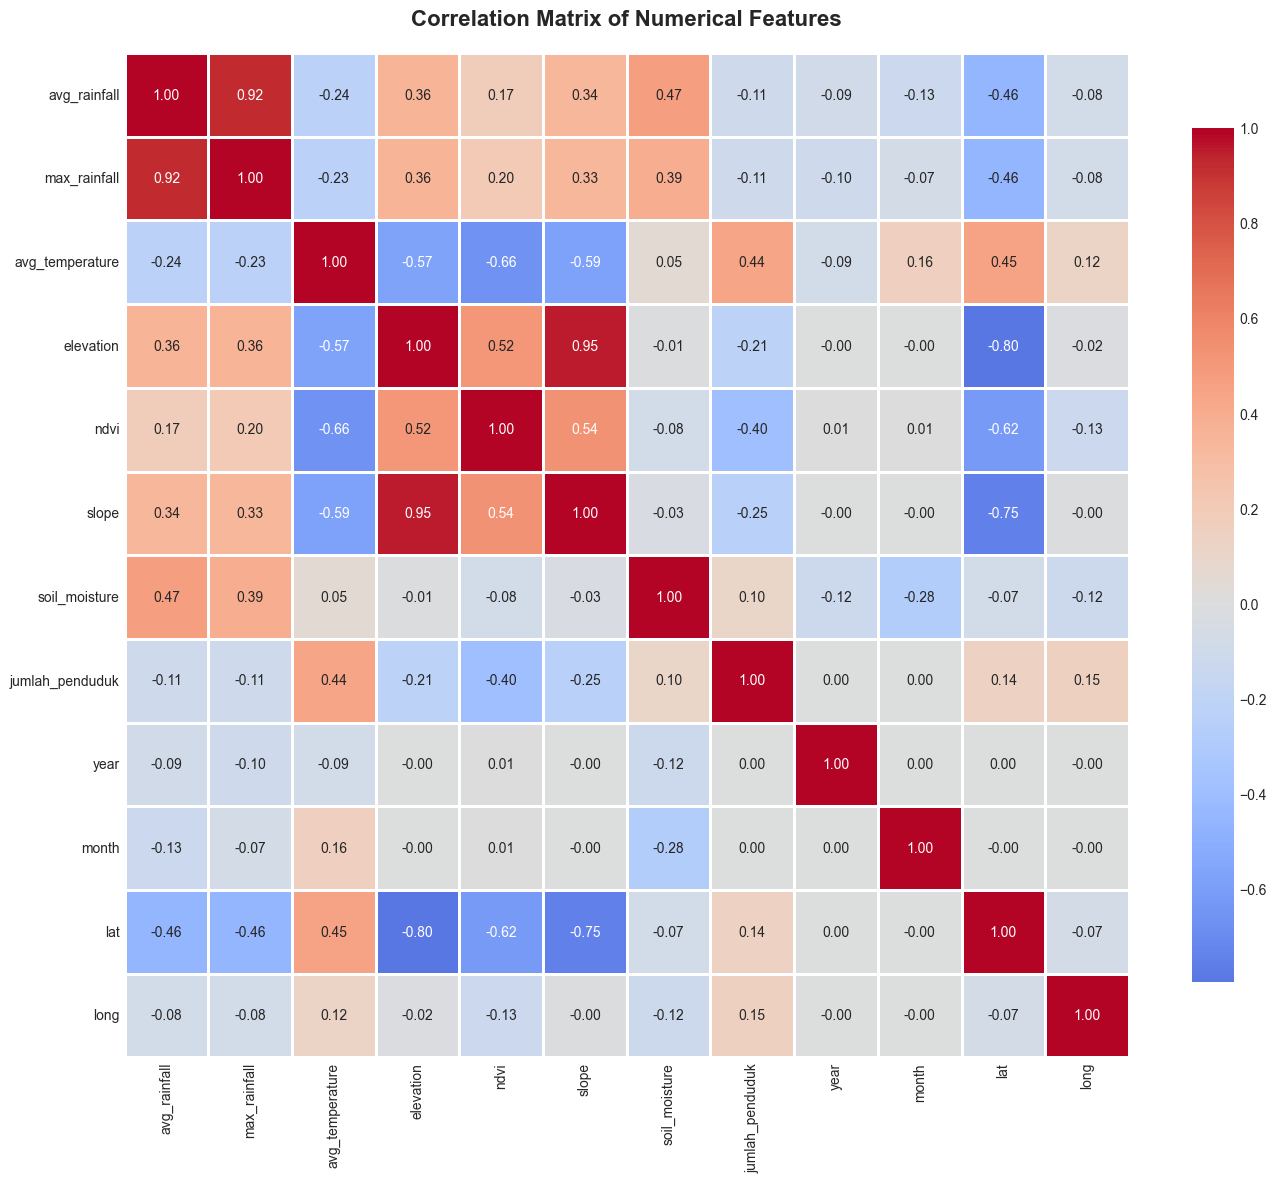


CORRELATION WITH TARGET VARIABLE (BANJIR)
avg_rainfall       0.180258
max_rainfall       0.167890
soil_moisture      0.141590
jumlah_penduduk    0.121310
long               0.062426
avg_temperature    0.024919
elevation          0.001081
slope             -0.011419
lat               -0.025852
ndvi              -0.103070
year              -0.121538
month             -0.156351


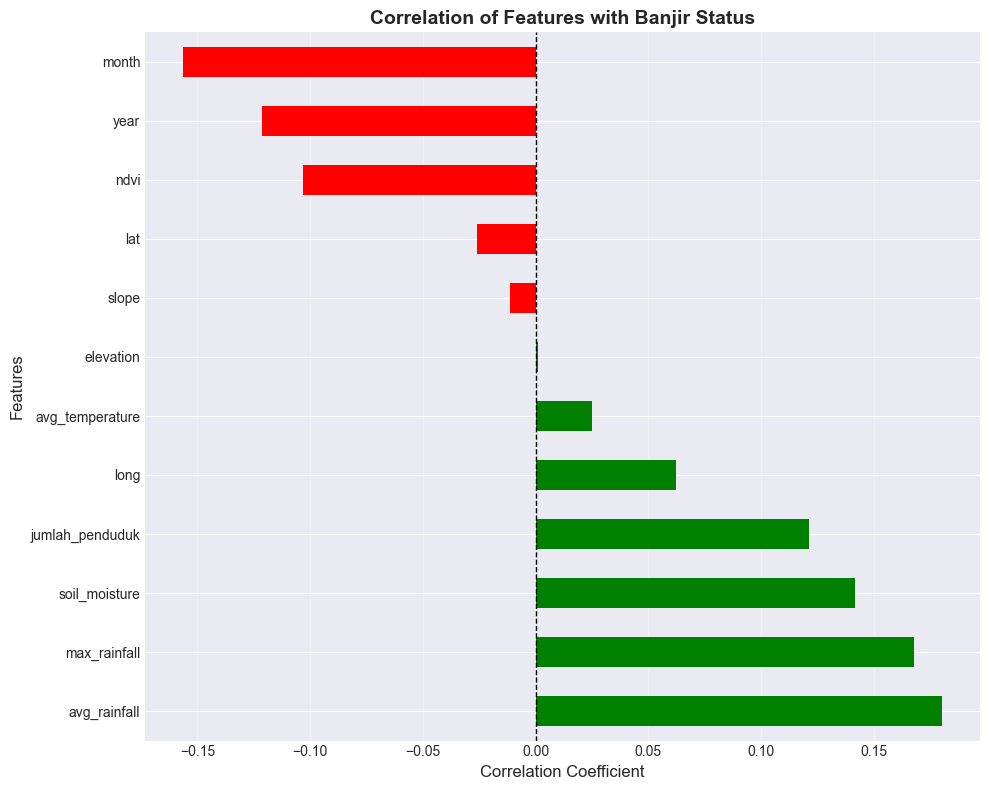

In [ ]:
numerical_cols_with_target = numerical_features + ['year', 'month', 'lat', 'long']
corr_matrix = df[numerical_cols_with_target].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Correlation with target variable (banjir)
# Note: banjir is categorical (0/1), we need to encode it first
df_temp = df.copy()
df_temp['banjir_encoded'] = df_temp['banjir'].astype(int)

corr_with_target = df_temp[numerical_cols_with_target + ['banjir_encoded']].corr()['banjir_encoded'].drop('banjir_encoded').sort_values(ascending=False)

print("\n" + "=" * 70)
print("CORRELATION WITH TARGET VARIABLE (BANJIR)")
print("=" * 70)
print(corr_with_target.to_string())

# Visualize correlation with target
plt.figure(figsize=(10, 8))
plt.figure(figsize=(10, 8))
corr_with_target.plot(kind='barh', color=['green' if x > 0 else 'red' for x in corr_with_target])
plt.title('Correlation of Features with Banjir Status', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

## 10. Geospatial Analysis

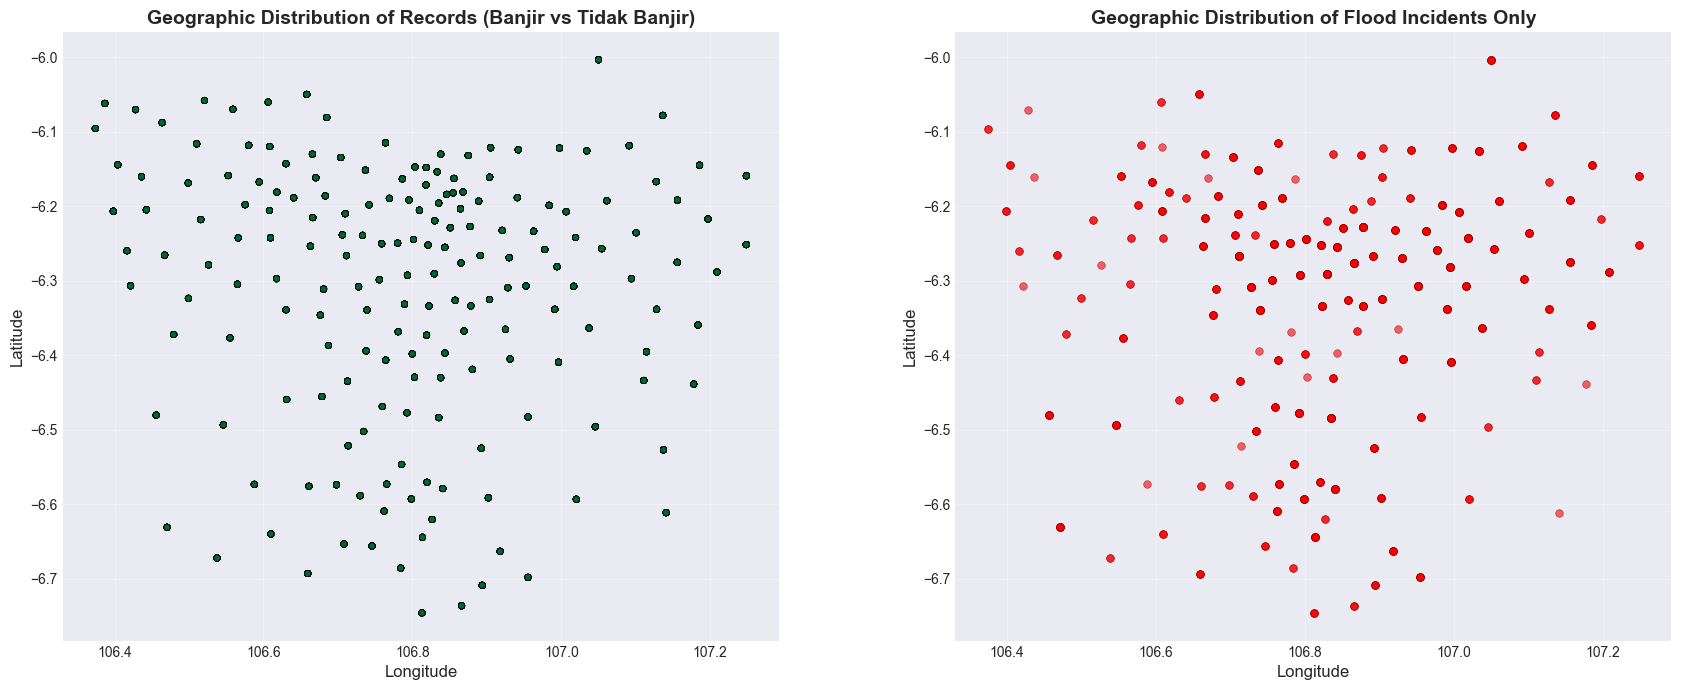


GEOGRAPHIC BOUNDS
Latitude Range:  -6.7461 to -6.0033
Longitude Range: 106.3742 to 107.2485


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

axes[0].scatter(df['long'], df['lat'], c=df['banjir'].astype(int), cmap='RdYlGn_r', 
                alpha=0.6, s=20, edgecolors='black', linewidth=0.5)
axes[0].set_title('Geographic Distribution of Records (Banjir vs Tidak Banjir)', 
                   fontsize=14, fontweight='bold')
axes[0].set_xlabel('Longitude', fontsize=12)
axes[0].set_ylabel('Latitude', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')

# Only flood incidents
flood_data = df[df['banjir'] == 1]
flood_data = df[df['banjir'] == 1]
axes[1].scatter(flood_data['long'], flood_data['lat'], c='red', 
                alpha=0.6, s=30, edgecolors='darkred', linewidth=0.5)
axes[1].set_title('Geographic Distribution of Flood Incidents Only', 
                   fontsize=14, fontweight='bold')
axes[1].set_xlabel('Longitude', fontsize=12)
axes[1].set_ylabel('Latitude', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("GEOGRAPHIC BOUNDS")
print("=" * 70)
print(f"Latitude Range:  {df['lat'].min():.4f} to {df['lat'].max():.4f}")

## 11. Key Insights & Summary

In [ ]:
print("=" * 70)
print("EDA SUMMARY - KEY FINDINGS")
print("=" * 70)

print("\nDATASET CHARACTERISTICS:")
print(f"  • Total Records: {len(df):,}")
print(f"  • Total Features: {df.shape[1]}")
print(f"  • Numerical Features: {len(numerical_cols)}")
print(f"  • Categorical Features: {len(categorical_cols)}")
print(f"  • Missing Values: {df.isnull().sum().sum()}")
print(f"  • Duplicate Rows: {df.duplicated().sum()}")

print("\nTARGET VARIABLE (BANJIR):")
banjir_counts = df['banjir'].value_counts()
print(f"  • Banjir: {banjir_counts.get(1, 0):,} ({banjir_counts.get(1, 0)/len(df)*100:.1f}%)")
print(f"  • Tidak Banjir: {banjir_counts.get(0, 0):,} ({banjir_counts.get(0, 0)/len(df)*100:.1f}%)")
print(f"  • Class Balance Ratio: {max(banjir_counts) / min(banjir_counts):.2f}:1")

print("\nGEOGRAPHIC COVERAGE:")
print(f"  • Unique Kabupaten/Kota: {df['kabupaten_kota'].nunique()}")
print(f"  • Unique Kecamatan: {df['kecamatan'].nunique()}")
print(f"  • Latitude Range: {df['lat'].min():.4f} to {df['lat'].max():.4f}")
print(f"  • Longitude Range: {df['long'].min():.4f} to {df['long'].max():.4f}")

print("\nTEMPORAL COVERAGE:")
print(f"  • Years: {sorted(df['year'].unique())}")
print(f"  • Months: {sorted(df['month'].unique())}")
print(f"  • Total Time Span: {df['year'].max() - df['year'].min() + 1} year(s)")

print("\nCLIMATE & ENVIRONMENT:")
print(f"  • Avg Rainfall: {df['avg_rainfall'].mean():.2f} ± {df['avg_rainfall'].std():.2f} mm")
print(f"  • Avg Temperature: {df['avg_temperature'].mean():.2f} ± {df['avg_temperature'].std():.2f} °C")
print(f"  • Avg Elevation: {df['elevation'].mean():.2f} ± {df['elevation'].std():.2f} m")
print(f"  • Landcover Classes: {df['landcover_class'].unique().tolist()}")

print("\nTOP FEATURES CORRELATED WITH BANJIR:")
if 'banjir_encoded' in df_temp.columns:
    top_corr = corr_with_target.head(5)
    for idx, (feature, corr_val) in enumerate(top_corr.items(), 1):
        print(f"  {idx}. {feature}: {corr_val:.4f}")

print("\n" + "=" * 70)
print("EDA COMPLETED SUCCESSFULLY!")
print("=" * 70)

EDA SUMMARY - KEY FINDINGS

📊 DATASET CHARACTERISTICS:
  • Total Records: 10,980
  • Total Features: 16
  • Numerical Features: 13
  • Categorical Features: 3
  • Missing Values: 0
  • Duplicate Rows: 0

🎯 TARGET VARIABLE (BANJIR):
  • Banjir: 845 (7.7%)
  • Tidak Banjir: 10,135 (92.3%)
  • Class Balance Ratio: 11.99:1

🌍 GEOGRAPHIC COVERAGE:
  • Unique Kabupaten/Kota: 13
  • Unique Kecamatan: 180
  • Latitude Range: -6.7461 to -6.0033
  • Longitude Range: 106.3742 to 107.2485

📅 TEMPORAL COVERAGE:
  • Years: [2020, 2021, 2022, 2023, 2024]
  • Months: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
  • Total Time Span: 5 year(s)

🌦️ CLIMATE & ENVIRONMENT:
  • Avg Rainfall: 38.12 ± 24.49 mm
  • Avg Temperature: 34.49 ± 4.05 °C
  • Avg Elevation: 111.87 ± 210.44 m
  • Landcover Classes: ['Tree cover', 'Built-up', 'Cropland', 'Permanent water bodies']

🔍 TOP FEATURES CORRELATED WITH BANJIR:
  1. avg_rainfall: 0.1803
  2. max_rainfall: 0.1679
  3. soil_moisture: 0.1416
  4. jumlah_penduduk: 0.1213